In [212]:
import pandas as pd
from genderize import Genderize
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
%matplotlib inline
import re

## Read CSV and data cleaning

In [144]:
df=pd.read_csv('salary2.csv',names= ["name", "Agency", "Total Pay", "Title","Rate_of_Pay","Year","Basis","Branch"])


In [145]:
df['firstname']=df['name'].apply(lambda x: x.split(',')[0])
df['lastname']=df['name'].apply(lambda x:x.split(',')[1])

In [131]:
df

,name,Agency,Total Pay,Title,Rate_of_Pay,Year,Basis,Branch,firstname,lastname
0,"Johnson, Candace",Roswell Park Cancer Institute Corporation,"$1,187,506",President & Ceo,"$867,000",2018,Annual,Public Authorities,Johnson,Candace
1,"Mohler, James",Roswell Park Cancer Institute Corporation,"$880,459","Sr Vice President, Translational Research, Cha...","$664,143",2018,Annual,Public Authorities,Mohler,James
2,"Odunsi, Adekunle",Roswell Park Cancer Institute Corporation,"$878,853","Deputy Director, Chair, Gynecological Oncology...","$809,266",2018,Annual,Public Authorities,Odunsi,Adekunle
3,"Fenstermaker, Robert",Roswell Park Cancer Institute Corporation,"$841,928","Chair, Neuro Oncology","$844,126",2018,Annual,Public Authorities,Fenstermaker,Robert
4,"Kuettel, Michael",Roswell Park Cancer Institute Corporation,"$792,345","Chair, Radiation Medicine","$765,551",2018,Annual,Public Authorities,Kuettel,Michael
5,"Filadora, Victor",Roswell Park Cancer Institute Corporation,"$791,795",Chief Of Clinical Services,"$637,727",2018,Annual,Public Authorities,Filadora,Victor
6,"Kuvshinoff, Boris",Roswell Park Cancer Institute Corporation,"$764,816",Chief Medical Officer,"$634,358",2018,Annual,Public Authorities,Kuvshinoff,Boris
7,"Schwaab, Thomas",Roswell Park Cancer Institute Corporation,"$756,611","Chief Of Strategy, Business Development And Ou...","$618,966",2018,Annual,Public Authorities,Schwaab,Thomas
8,"Yendamuri, Saikrishna",Roswell Park Cancer Institute Corporation,"$743,020",Chair,"$701,226",2018,Annual,Public Authorities,Yendamuri,Saikrishna
9,"Ernstoff, Marc",Roswell Park Cancer Institute Corporation,"$741,326",Senior Vice President,"$615,742",2018,Annual,Public Authorities,Ernstoff,Marc


In [146]:
df['lastname']= df['lastname'].apply(lambda x: x.split(' ')[1])

## Load the dataset from predict_gender.py 

- Call API to get predicted gender (predict_gender.py)
- Read the csv of predicted gender dataset

In [321]:

df_lastname=pd.read_csv('gender.csv')

df_lastname=df_lastname.iloc[:,1:]

In [322]:

df3= pd.merge(df, df_lastname, on='lastname').drop_duplicates()
df3=df3.reset_index(drop=True)


- check the column of gender with value returned 

In [323]:
len(df3[df3['gender'].notnull()])


7862

In [324]:
df_gender=df3[df3['gender'].notnull()].reset_index(drop=True)
df_gender=df_gender.replace('NDR','')

In [325]:
def formatter(df, colname, before, after):
    df[colname] = [x.replace(before,after) for x in df[colname]]

In [326]:
columns = ['Total Pay','Total Pay','Rate_of_Pay','Rate_of_Pay']
befores = ['$',',','$',',']
afters = ['','','','']

for col, bef, aft in zip(columns, befores, afters):
    formatter(df_gender, col, bef, aft)

In [327]:
df_gender['Total Pay']=pd.to_numeric(df_gender['Total Pay'], downcast='float')
df_gender['Rate_of_Pay']=pd.to_numeric(df_gender['Rate_of_Pay'],downcast='float')

- only extract the data with name prediction probability >90%

In [329]:
df_gender=df_gender.loc[df_gender['probability']>0.9]
len(df_gender)

7609

In [330]:
len(df_gender.loc[df_gender['gender']=='male'])

6463

- Break down the title categories

In [252]:
df_gender['Title']=[x.lower() for x in df_gender['Title']]

df_gender['Assistant']=[1 if (re.search('^ass', x) != None) else 0 for x in df_gender['Title']]
df_gender['Captain']=[1 if (re.search('^cap',x)!=None) else 0 for x in df_gender['Title']]
df_gender['Chief']=[1 if (re.search('^chi',x)!=None)else 0 for x in df_gender['Title']]
df_gender['Administrative']=[1 if (re.search('^ad',x)!=None) else 0 for x in df_gender['Title']]

In [185]:
group=df_gender.groupby('gender')
group['Total Pay'].mean()

gender
female    213585.984375
male      213621.015625
Name: Total Pay, dtype: float32

## Comparison for average salary for both male and female 

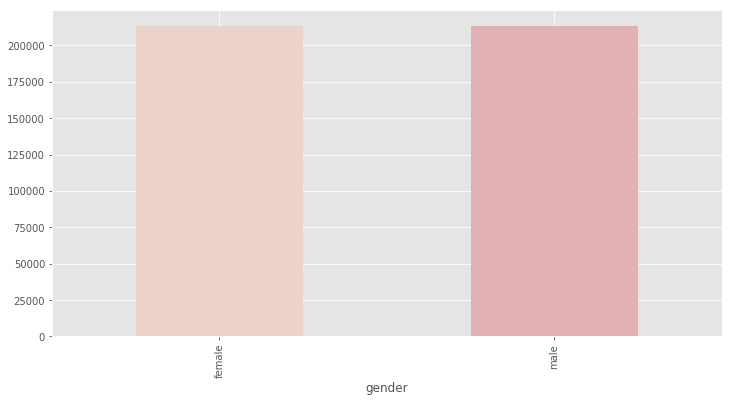

In [331]:
with sns.cubehelix_palette(8):
    plt.figure(figsize=(12,6))
    group['Total Pay'].mean().plot.bar()

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



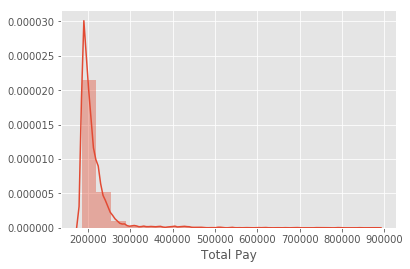

In [332]:
Malepay=df_gender.loc[df_gender['gender']=='male'].sort_values('Total Pay',ascending=False)
sns.distplot(Malepay['Total Pay'],bins=20)

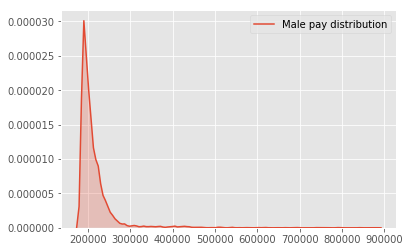

In [333]:
sns.kdeplot(Malepay['Total Pay'], shade=True, label='Male pay distribution')

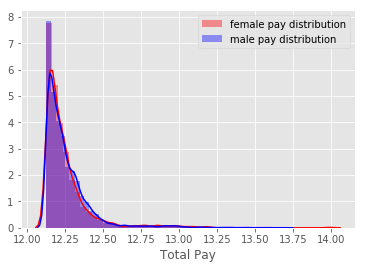

In [334]:
Femalepay=df_gender.loc[df_gender['gender']=='female'].sort_values('Total Pay',ascending=False)
Femalepay['Total Pay']=np.log(Femalepay['Total Pay'])
Malepay['Total Pay']=np.log(Malepay['Total Pay'])
sns.distplot(Femalepay['Total Pay'], color='red', label='female pay distribution')
sns.distplot(Malepay['Total Pay'],color='blue',label='male pay distribution')
plt.legend()
plt.savefig("output.png")

- Generally, female and male pay distribution overlaps and there is no major difference in salary for male and female working professionals

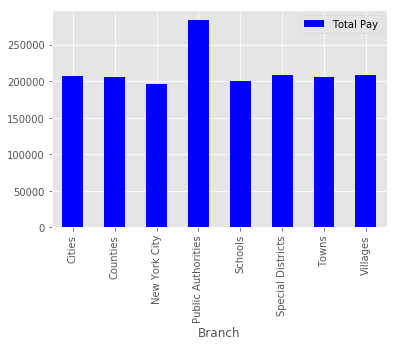

In [86]:
df_gender[['Branch','Total Pay']].groupby('Branch').median().plot.bar(color='b')

## Gender salary difference for different branch

In [335]:
df_gender.sort_values('Total Pay',ascending=False)
df_outliers=df_gender.loc[df_gender['Total Pay']<900000]

<Figure size 504x720 with 0 Axes>

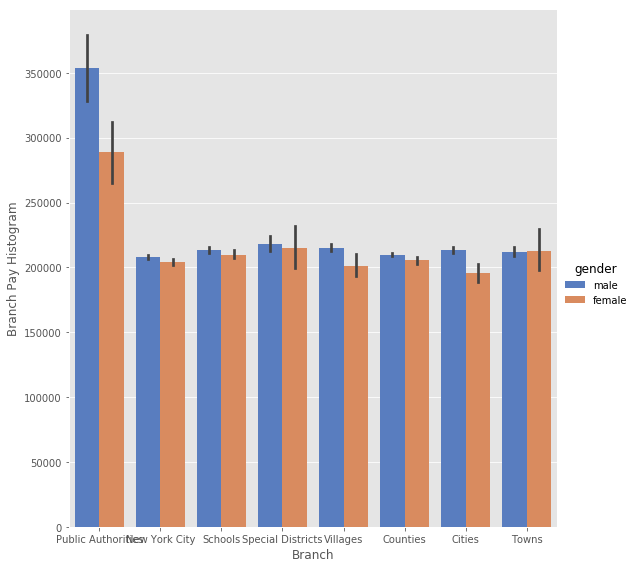

In [336]:
plt.figure(figsize = (7,10))
g=sns.catplot(x="Branch", y="Total Pay", hue="gender", data=df_outliers,
                height=8, kind="bar", palette="muted")
g.set_ylabels("Branch Pay Histogram")


- Among all braches, there is an obvious gender gap in salary in Public authorities

In [337]:
df_PA=df_outliers.loc[df_outliers['Branch']=='Public Authorities']

df_PA['Agency']=[x.replace('Roswell Park Cancer Institute Corporation','Cancer Institute')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Niagara Frontier Transportation Authority','Niagara Transportation')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Development Authority of the North Country','Development')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Municipal Authorities','Municipal')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Rochester-Genesee Regional Transportation Authority','Rochester')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Urban Development Corporation','Urban Development')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Central New York Regional Transportation Authority','Central NY Trans')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Energy Research and Development Authority','Energy')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Hudson River Park Trust','Park Trust')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Affordable Housing Corporation','Housing')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Dormitory Authority','Dormitory')for x in df_PA['Agency']]
df_PA['Agency']=[x.replace('Housing Trust Fund Corporation','Housing')for x in df_PA['Agency']]


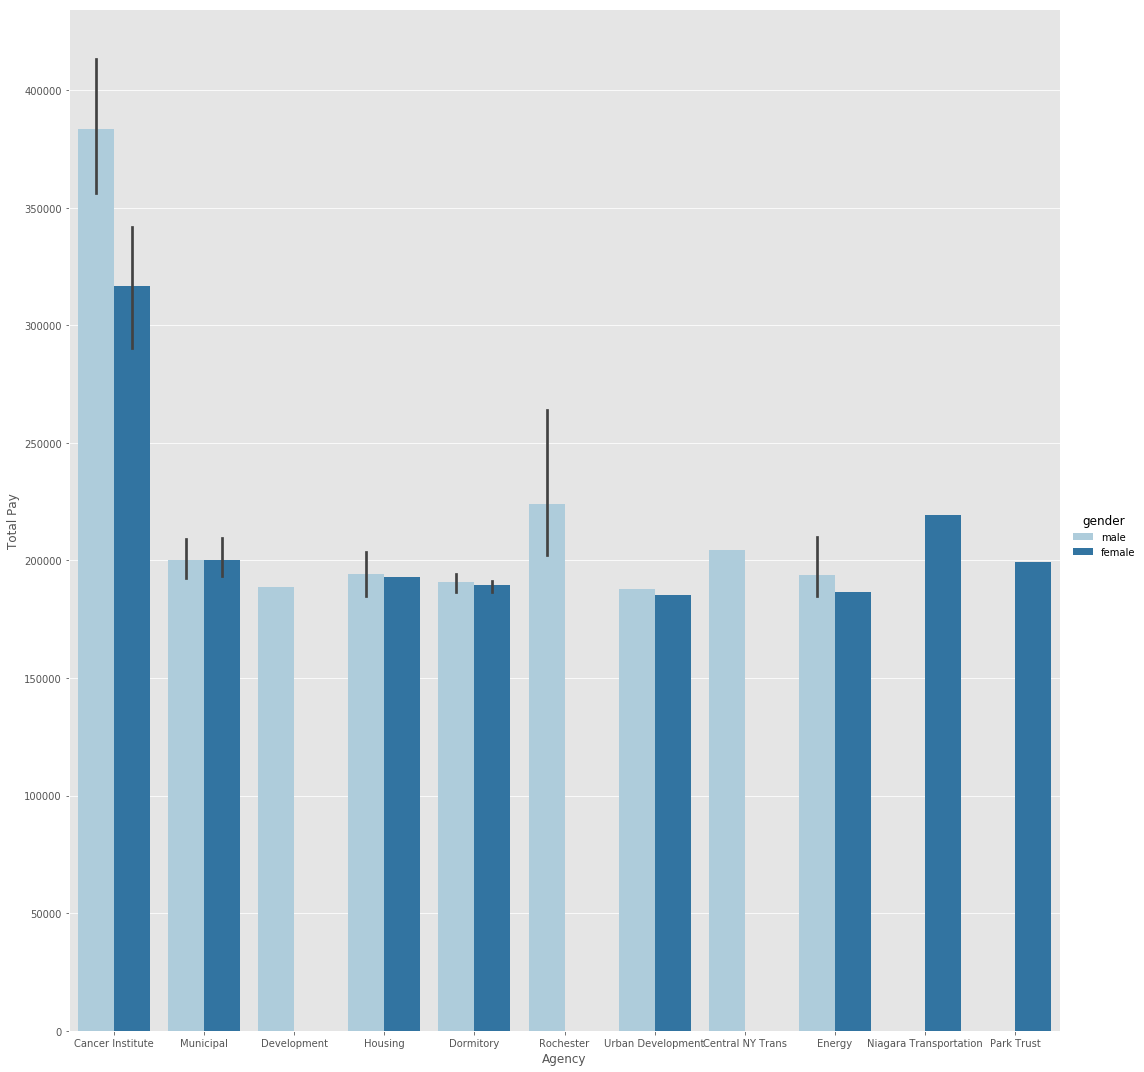

In [340]:
g=sns.catplot(x="Agency", y="Total Pay", hue="gender", data=df_PA,
                height=15, kind="bar", palette="Paired")

- We observed a major gap within Cancer Institute and we further confirm the difference by running a t-test

In [191]:

df_female=df_PA[(df_PA['Agency'] =='Cancer Institue') & (df_PA['gender'] =='female' )]
df_male=df_PA[(df_PA['Agency'] =='Cancer Institue') & (df_PA['gender'] =='male' )]

In [192]:
import plotly 
plotly.tools.set_credentials_file(username='wanxin', api_key='IvSU1vYvCCEQ5iJO9gxT')

## T-test for salary gap in Roswell Park Cancer Institute

In [121]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy

twosample_results = scipy.stats.ttest_ind(df_female['Total Pay'], df_male['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~wanxin/0 or inside your plot.ly account where it is named 'twosample-table'


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



- With p-value < 0.01, there is a statistically significant difference between female and male's salary in Roswell Cancer Institue

## T-test for general average salary 

In [122]:
twosample_results = scipy.stats.ttest_ind(Femalepay['Total Pay'], Malepay['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-all')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Wordcloud to inspect job titles frequency for males and females

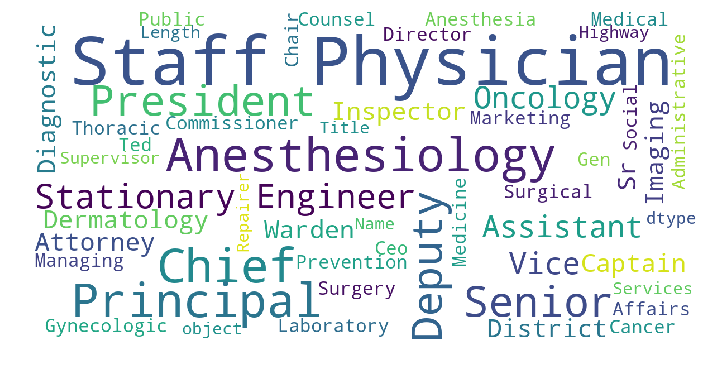

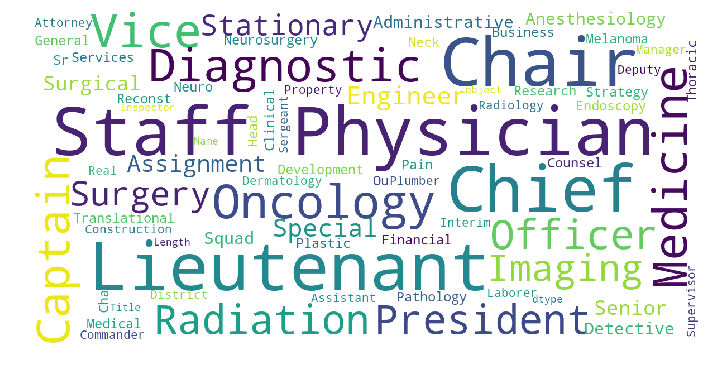

In [219]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=800,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(Femalepay['Title'])
show_wordcloud(Malepay['Title'])

## T-test for salary for those whose job titles are captain

In [247]:
df_at_m=df_outliers[(df_outliers['Title']=='Captain')& (df_outliers['gender']=='male')]
df_at_f=df_outliers[(df_outliers['Title']=='Captain')& (df_outliers['gender']=='female')]



In [248]:
twosample_results = scipy.stats.ttest_ind(df_at_m['Total Pay'], df_at_f['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-principals')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Histogram for males and females with same job titles

In [309]:
df_gender['category']=['Assistant' if (re.search('^ass',x)!=None)else 'Chief' if (re.search('^chi',x)!=None) else 'Captain' if (re.search('^cap',x)!=None) else 'Administrative' if(re.search('^ad',x)!=None) else'St_physician'if(re.search('^staf',x)!=None) else'' for x in df_gender['Title']]

In [310]:
df_gender

,name,Agency,Total Pay,Title,Rate_of_Pay,Year,Basis,Branch,firstname,lastname,count,gender,probability,Assistant,Captain,Chief,Administrative,Staff_Physician,category
0,"Johnson, Candace",Roswell Park Cancer Institute Corporation,1187506.0,president & ceo,867000.0,2018,Annual,Public Authorities,Johnson,Candace,313.0,female,1.00,0,0,0,0,0,
1,"Mohler, James",Roswell Park Cancer Institute Corporation,880459.0,"sr vice president, translational research, cha...",664143.0,2018,Annual,Public Authorities,Mohler,James,6359.0,male,0.99,0,0,0,0,0,
2,"Daly, James L","Environment Protection, Department of",435048.0,stationary engineer,467.0,2018,Daily,New York City,Daly,James,6359.0,male,0.99,0,0,0,0,0,
3,"Kadavunkal, James","Environment Protection, Department of",403752.0,stationary engineer,467.0,2018,Daily,New York City,Kadavunkal,James,6359.0,male,0.99,0,0,0,0,0,
4,"Kaishian, James M",Briarcliff Manor Union Free Schools,288143.0,,NaN,2018,,Schools,Kaishian,James,6359.0,male,0.99,0,0,0,0,0,
5,"Bellezza, James M","Transportation, Department of",286396.0,crane operator ampes,505.0,2018,Daily,New York City,Bellezza,James,6359.0,male,0.99,0,0,0,0,0,
6,"Mccann, James T","Environment Protection, Department of",279126.0,stationary engineer,467.0,2018,Daily,New York City,Mccann,James,6359.0,male,0.99,0,0,0,0,0,
7,"Salerno, James",Police & Fire,273695.0,,NaN,2018,,Special Districts,Salerno,James,6359.0,male,0.99,0,0,0,0,0,
8,"Dillon, James J",Lynbrook,271842.0,,NaN,2018,,Villages,Dillon,James,6359.0,male,0.99,0,0,0,0,0,
9,"Watson, James G",Nassau,271003.0,,NaN,2018,,Counties,Watson,James,6359.0,male,0.99,0,0,0,0,0,


In [311]:
df_Cate=df_gender.loc[df_gender['category'].isin(['Assistant','Captain','Chief','Administrative','St_physician'])].reset_index(drop=True)

In [346]:
df_Cate.groupby(['gender','category']).size()

gender  category      
female  Administrative     25
        Assistant          57
        Captain            67
        Chief              17
        St_physician       38
male    Administrative     56
        Assistant          94
        Captain           693
        Chief              32
        St_physician       76
dtype: int64

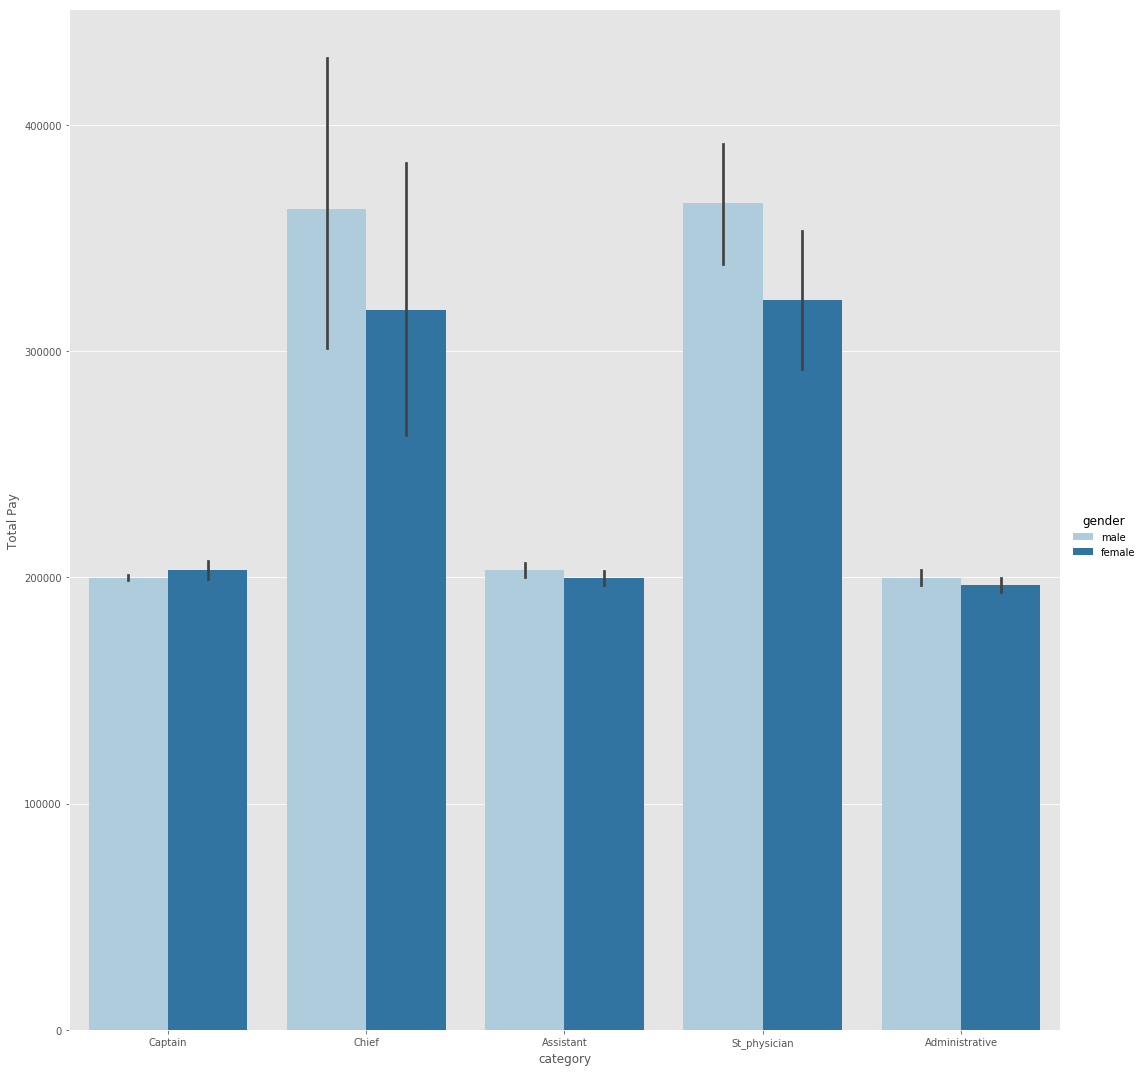

In [312]:
g=sns.catplot(x="category", y="Total Pay", hue="gender", data=df_Cate,
                height=10, kind="bar", palette="Paired")

In [318]:
df_cap_m=df_Cate[(df_Cate['category']=='Administrative')& (df_Cate['gender']=='male')]
df_cap_f=df_Cate[(df_Cate['category']=='Administrative')& (df_Cate['gender']=='female')]
twosample_results = scipy.stats.ttest_ind(df_cap_m['Total Pay'], df_cap_f['Total Pay'])


matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-captain')

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:1545: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

